In [1]:
import pyxdf
import numpy as np
from utils import sync_streams, combine_streams

Group 1:

Task Begin: Immediately after Chris says "Begin"
Task End: Immediately after Chris says "Alright, time's up"

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1727791819.271
Task Beginning UNIX timestamp: 1727792156.738 (337 sec in)
Task End       UNIX timestamp: 1727795729.938 (3910 sec in)

HCI_Lab1
Start OBS Vid  UNIX timestamp: 1727791888.508
Task Beginning UNIX timestamp: 1727792156.738 (268 sec in)

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1727791909.857
Task Beginning UNIX timestamp: 1727792176.540 (266 sec in)

In [2]:
group_num = 1
WPI_xdf_path = f"../Group {group_num}/HCILab1-Group1.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_01_10.xdf"
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)
video_start_UNIX_times = {
    "OBS_HCILab1": 1727791888.508,
    "OBS_HCILab2": 1727791909.857,
    "OBS_CSL_Laptop": 1727791819.271
}
task_start_UNIX_times = {
    "OBS_HCILab1": 1727792156.738,
    "OBS_HCILab2": 1727792176.540,
    "OBS_CSL_Laptop": 1727792156.738
}
task_duration = 1727795729.938 - 1727792156.738
task_duration

Stream 6: Calculated effective sampling rate 14.5166 Hz is different from specified rate 30.0000 Hz.
Stream 3: Calculated effective sampling rate 215.7338 Hz is different from specified rate 250.0000 Hz.
Stream 5: Calculated effective sampling rate 14.5717 Hz is different from specified rate 30.0000 Hz.


3573.2000000476837

In [3]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, video_start_UNIX_times, task_start_UNIX_times, task_duration)

length of EEG stream: 1009144
start_EEG_index: 70940, end_EEG_index: 964240
padded_start_EEG_index: 61940, padded_end_EEG_index: 973240
actual end EEG index: 902300
For EEG Stream Unicorn_HCILab1, start cutoff index is 9000 and end cutoff index is 902300

length of EEG stream: 857742
start_EEG_index: 81072, end_EEG_index: 974372
padded_start_EEG_index: 72072, padded_end_EEG_index: 983372
actual end EEG index: 785670
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 785670

length of EEG stream: 995227
start_EEG_index: 84660, end_EEG_index: 977960
padded_start_EEG_index: 75660, padded_end_EEG_index: 986960
actual end EEG index: 902300
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 9000 and end cutoff index is 902300



In [4]:
# manually sync Stream Unicorn_CSL_LabPC for Group 1 and 2
Unicorn_CSL_LabPC_stream = streams["Unicorn_CSL_LabPC"]
OG_EEG_stream_len = len(streams["Unicorn_CSL_LabPC"])

# calculated by: after_Unicorn_CSL_Laptop stream starting time stamp - (diff between before_Unicorn_CSL_Laptop stream starting time stamp and before_Unicorn_CSL_LabPC stream starting time stamp)
start_cutoff_timestamp = 4859121.311531116 - (4858782.925259427 - 4858781.894095449)
start_cutoff_index = np.searchsorted(Unicorn_CSL_LabPC_stream["time_stamps"], start_cutoff_timestamp)

print("start_cutoff_index: " + str(start_cutoff_index))

end_cutoff_index = start_cutoff_index + round(250 * task_duration)
padded_start_cutoff_index = start_cutoff_index - 9000
padded_end_cutoff_index = end_cutoff_index + 9000

start_cut_off_index = 9000
if padded_start_cutoff_index < 0:
    padded_start_cutoff_index = 0
    start_cut_off_index = start_cutoff_index

Unicorn_CSL_LabPC_stream["time_stamps"] = Unicorn_CSL_LabPC_stream["time_stamps"][padded_start_cutoff_index:padded_end_cutoff_index]
Unicorn_CSL_LabPC_stream["time_series"] = Unicorn_CSL_LabPC_stream["time_series"][padded_start_cutoff_index:padded_end_cutoff_index]

if end_cutoff_index >= OG_EEG_stream_len:
    print("[cut short] For EEG Stream Unicorn_CSL_LabPC, start cutoff index is " + str(start_cut_off_index) + " and end cutoff index is " + str(len(Unicorn_CSL_LabPC_stream["time_series"])))
else:
    print("For EEG Stream Unicorn_CSL_LabPC, start cutoff index is " + str(start_cut_off_index) + " and end cutoff index is " + str(end_cutoff_index - padded_start_cutoff_index))

start_cutoff_index: 84435
[cut short] For EEG Stream Unicorn_CSL_LabPC, start cutoff index is 9000 and end cutoff index is 911300


/Users/henryhuang/3rd Year/research/brain-hci/EEG-sync/virtual_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


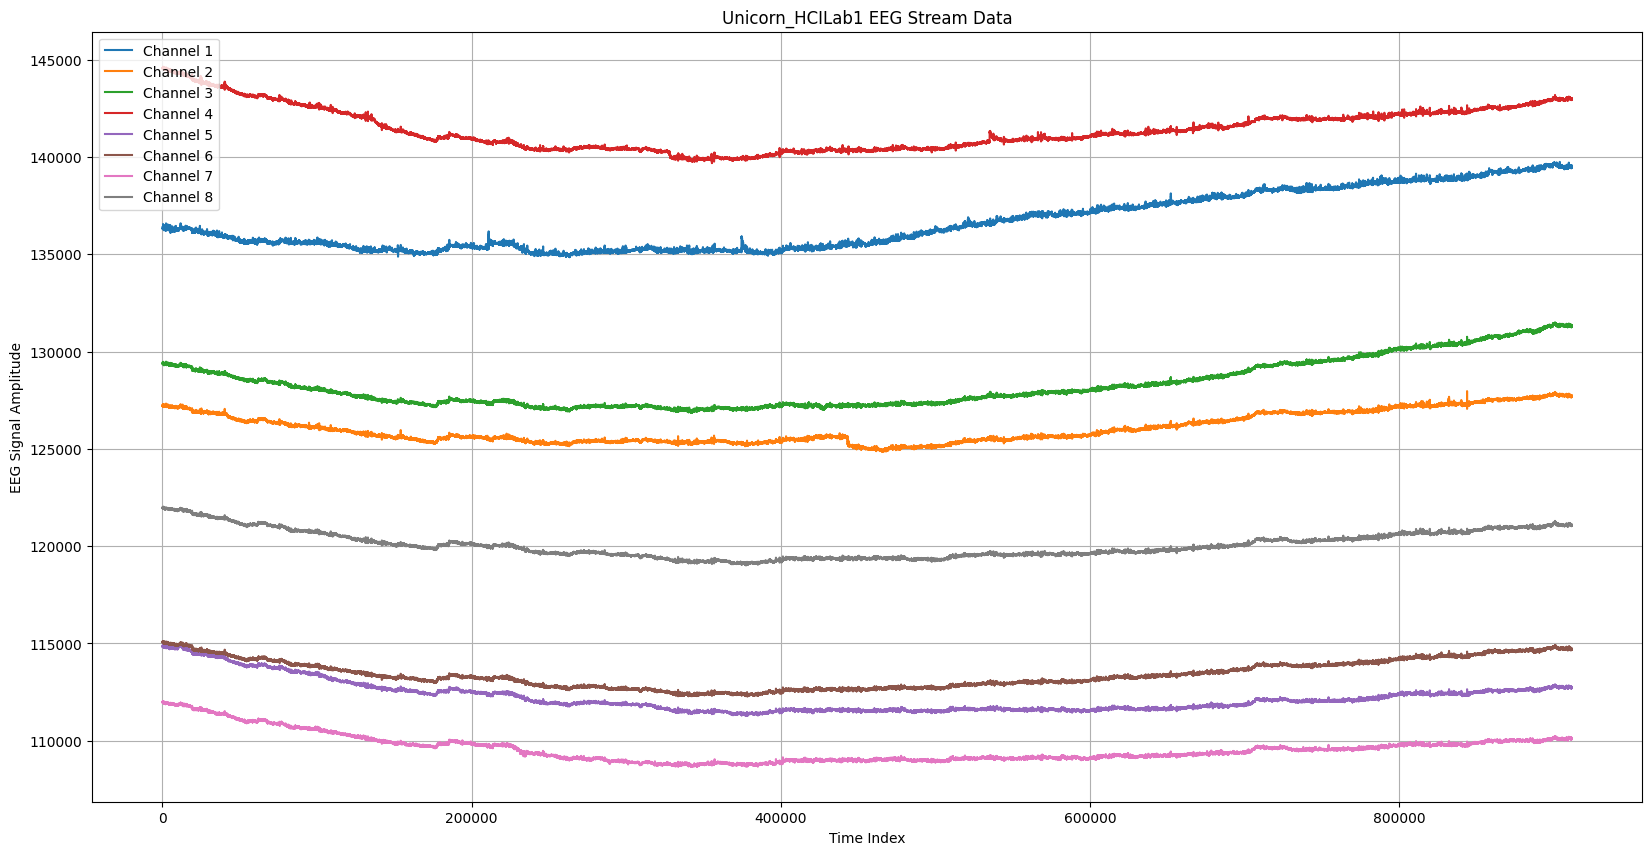

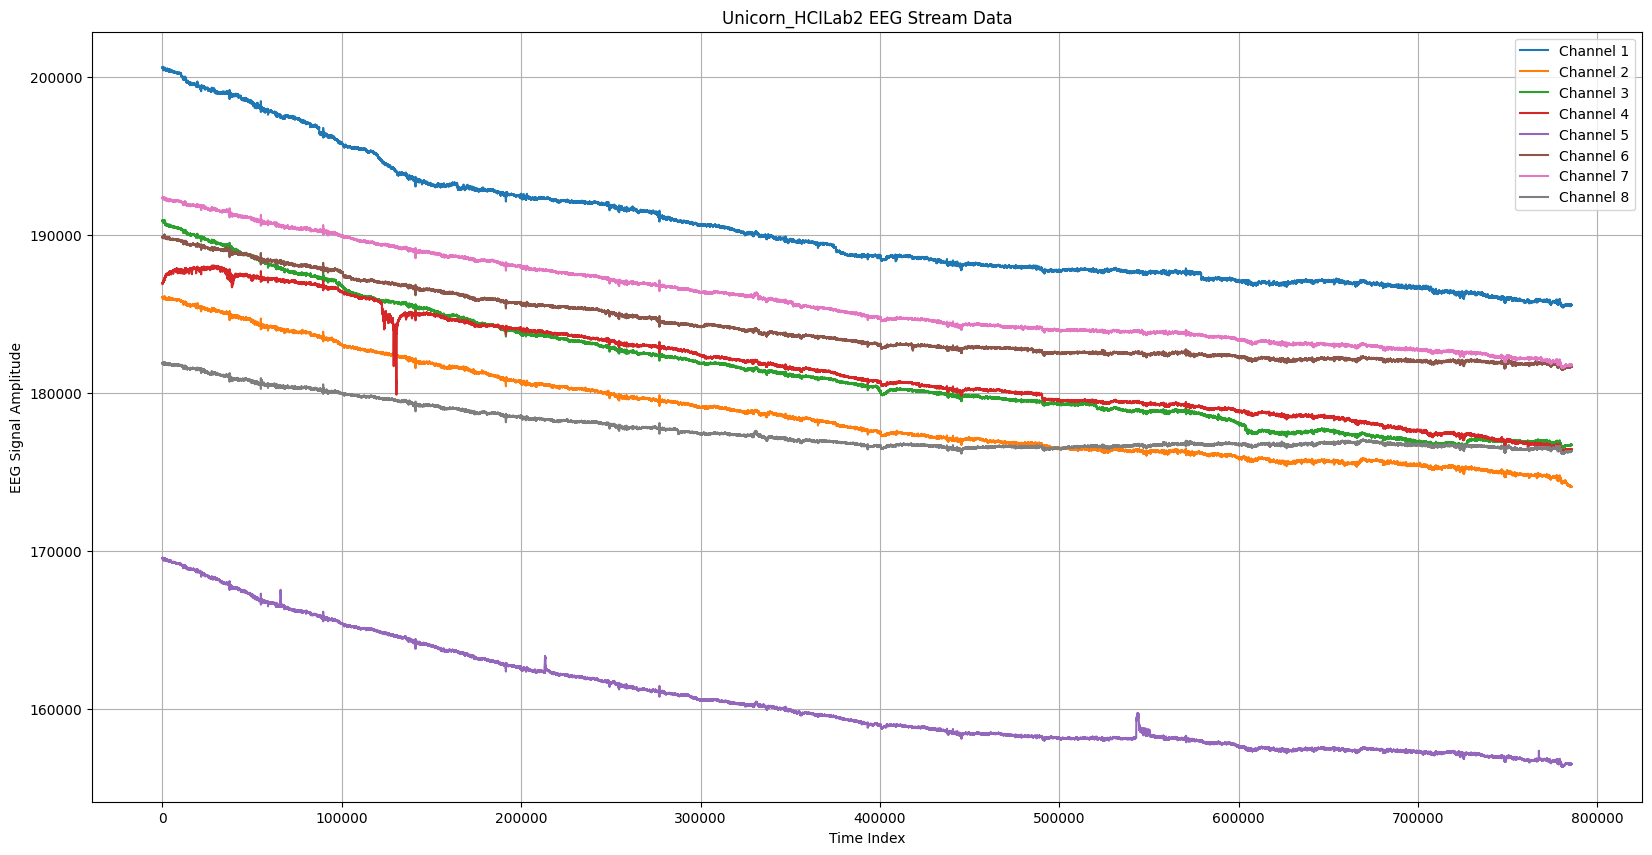

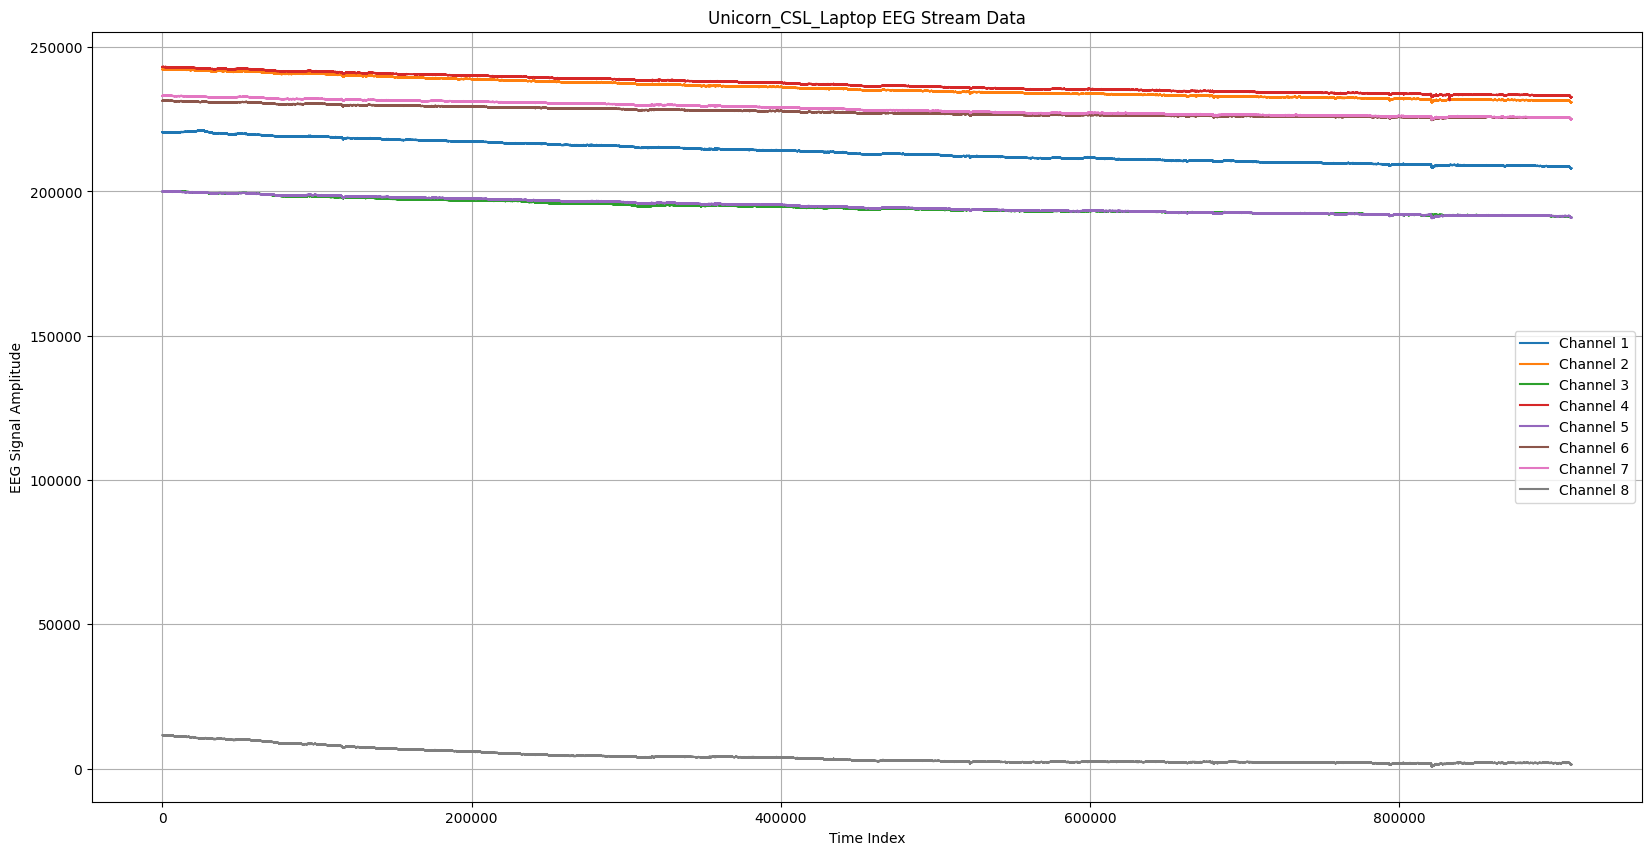

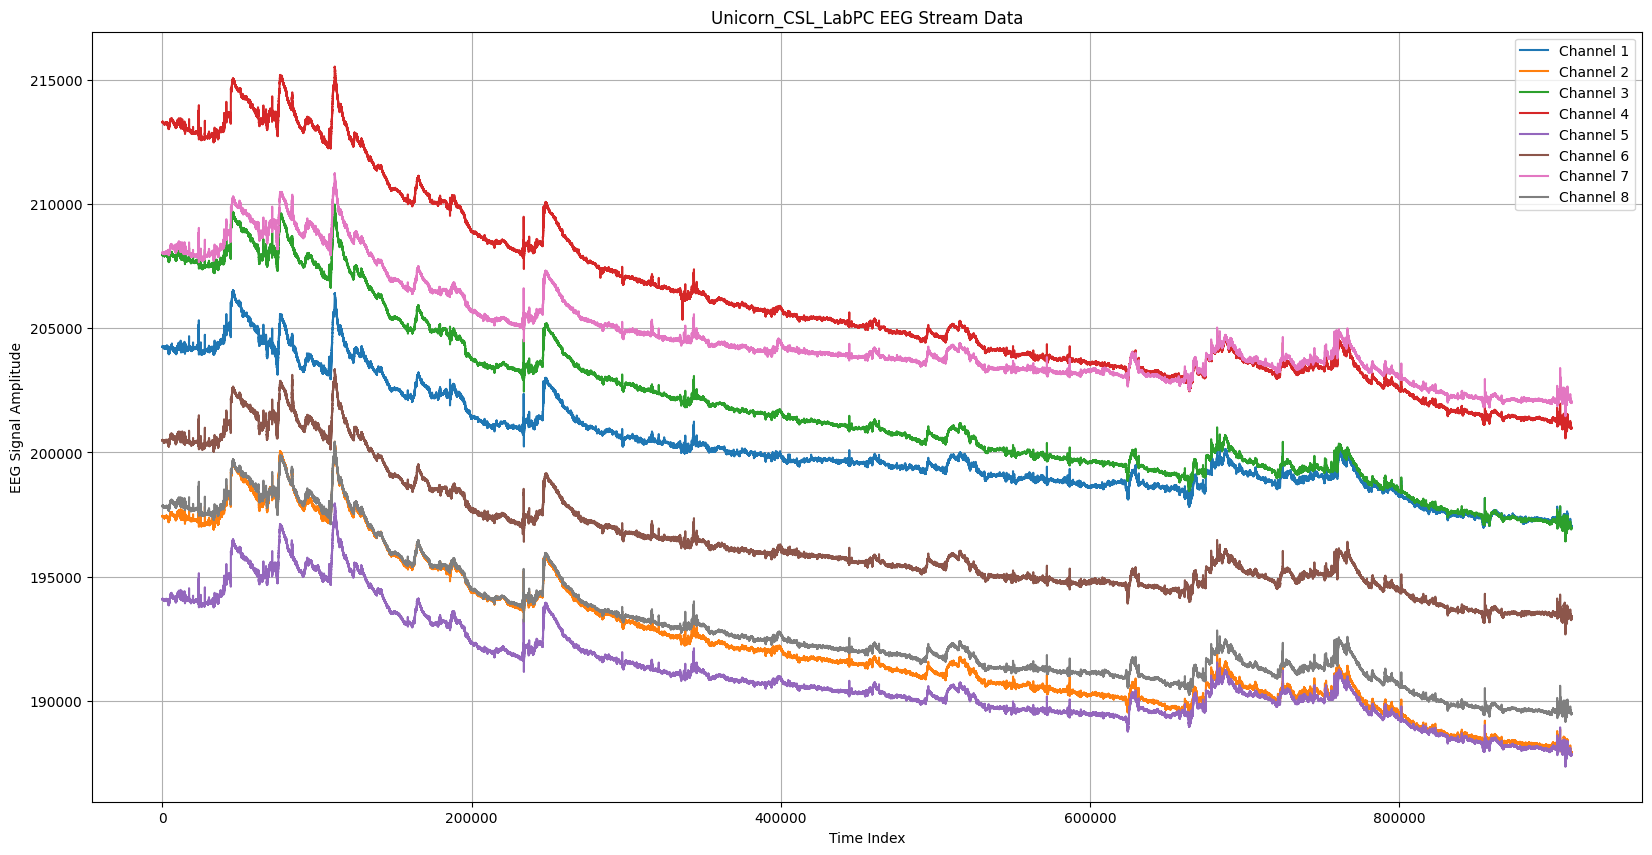

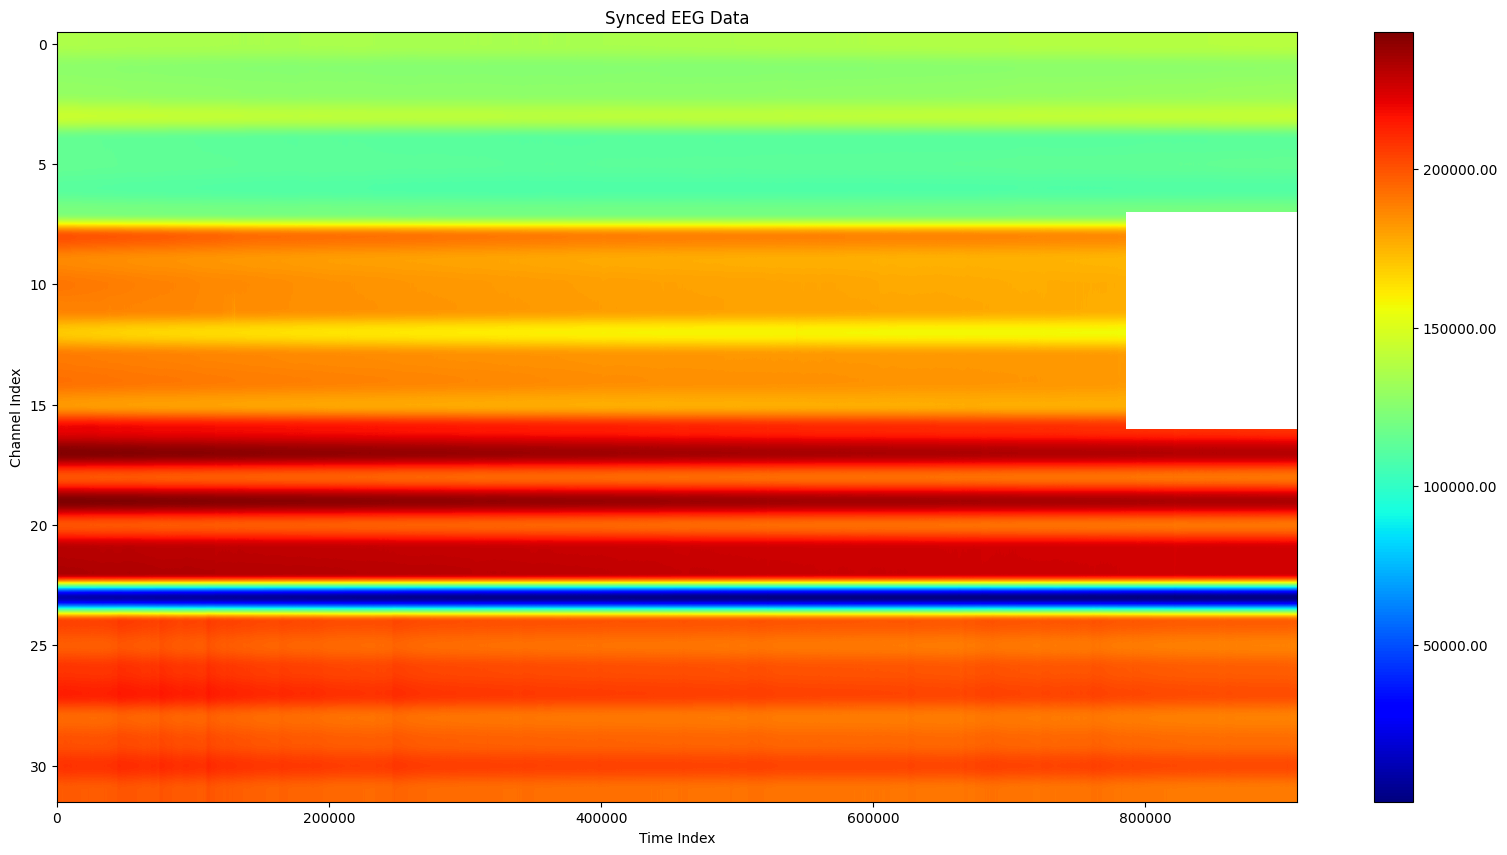

Min: 643.1043701171875
Max: 243224.078125
Mean: 173242.98955762517
Standard Deviation: 48363.771493736116


In [5]:
combine_streams(group_num, streams)